<a href="https://colab.research.google.com/github/Arun7055/Decoding_Raid_Strategies/blob/main/KabaddiFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###MATCHWISE SYNTHETIC DATA GENERATION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import random

teams = [
    "Patna Pirates", "Bengaluru Bulls", "Dabang Delhi", "Bengal Warriors",
    "U Mumba", "Haryana Steelers", "UP Yoddha", "Telugu Titans",
    "Tamil Thalaivas", "Gujarat Giants", "Jaipur Pink Panthers", "Puneri Paltan"
]

def generate_match(match_id):
    team1, team2 = random.sample(teams, 2)

    # Random stats for team1
    t1_super_raids = random.randint(0, 5)
    t1_super_tackles = random.randint(0, 6)
    t1_super10 = random.choice([0, 1])
    t1_dod = random.randint(0, 10)
    t1_total = random.randint(20, 50)

    # Random stats for team2
    t2_super_raids = random.randint(0, 5)
    t2_super_tackles = random.randint(0, 6)
    t2_super10 = random.choice([0, 1])
    t2_dod = random.randint(0, 10)
    t2_total = random.randint(20, 50)

    # Decide winner based on total points
    if t1_total > t2_total:
        t1_result, t2_result = 1, 0
    elif t2_total > t1_total:
        t1_result, t2_result = 0, 1
    else:  # draw case (rare)
        t1_result, t2_result = 0, 0

    return [
        [match_id, team1, team2, t1_super_raids, t1_super_tackles, t1_super10, t1_dod, t1_total, t1_result],
        [match_id, team2, team1, t2_super_raids, t2_super_tackles, t2_super10, t2_dod, t2_total, t2_result]
    ]

# Generate 60 matches (30 for training, 30 for testing)
train_data = []
test_data = []

for i in range(1, 31):
    train_data.extend(generate_match(i))

for i in range(31, 61):
    test_data.extend(generate_match(i))

# Convert to DataFrames
columns = ["match_id", "team", "opponent", "super_raids", "super_tackles", "super_10", "do_or_die_points", "total_points", "result"]

train_df = pd.DataFrame(train_data, columns=columns)
test_df = pd.DataFrame(test_data, columns=columns)

# Save to CSV
train_df.to_csv("kabaddi_train.csv", index=False)
test_df.to_csv("kabaddi_test.csv", index=False)

print("✅ Training set shape:", train_df.shape)
print("✅ Testing set shape:", test_df.shape)
print(train_df.head())


✅ Training set shape: (60, 9)
✅ Testing set shape: (60, 9)
   match_id             team         opponent  super_raids  super_tackles  \
0         1  Bengaluru Bulls   Gujarat Giants            3              2   
1         1   Gujarat Giants  Bengaluru Bulls            3              6   
2         2  Bengaluru Bulls  Tamil Thalaivas            2              6   
3         2  Tamil Thalaivas  Bengaluru Bulls            3              5   
4         3  Bengaluru Bulls   Gujarat Giants            5              4   

   super_10  do_or_die_points  total_points  result  
0         0                 4            40       1  
1         1                 0            35       0  
2         0                 7            41       0  
3         0                 3            44       1  
4         0                 8            47       1  


Training 5 models logistic regression, decsion tree, random forest, xgboost, svm on do-ordie raid, super raid and super tackle The earlier generated train.csv is used here Here the corelation between these attributes and outcome of the match

In [ ]:
# ==========================================
# TRAINING SCRIPT (Colab)
# ==========================================

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import joblib

# ---- Load Training Data ----
train_df = pd.read_csv("kabaddi_train.csv")

# Features = types of raids/tackles, Target = result
features = ['super_raids', 'super_tackles', 'super_10', 'do_or_die_points', 'total_points']
X_train, y_train = train_df[features], train_df['result']

# ---- Train Models ----
models = {
    "log_model": LogisticRegression(max_iter=1000),
    "dt_model": DecisionTreeClassifier(max_depth=5, random_state=42),
    "rf_model": RandomForestClassifier(n_estimators=100, random_state=42),
    "xgb_model": xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "svm_model": SVC(kernel="rbf", probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name}.pkl")

# Save feature list too
joblib.dump(features, "features.pkl")

print("✅ Models trained and saved successfully!")


✅ Models trained and saved successfully!


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:14:10] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test and prediction


🔹 Logistic Regression
Accuracy: 0.8
ROC AUC: 0.896
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60


🔹 Decision Tree
Accuracy: 0.683
ROC AUC: 0.723
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        32
           1       0.65      0.71      0.68        28

    accuracy                           0.68        60
   macro avg       0.68      0.69      0.68        60
weighted avg       0.69      0.68      0.68        60


🔹 Random Forest
Accuracy: 0.767
ROC AUC: 0.809
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                      

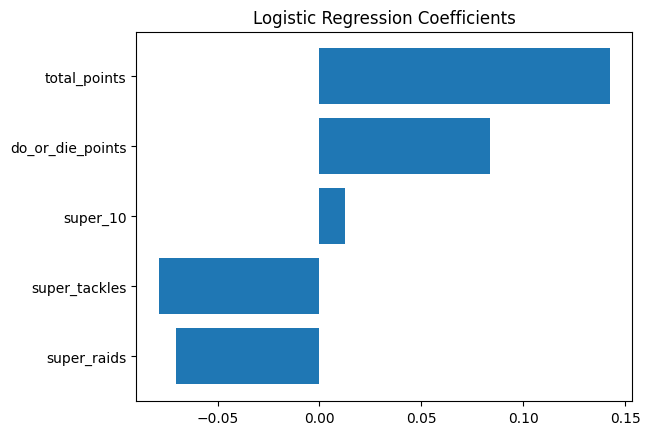

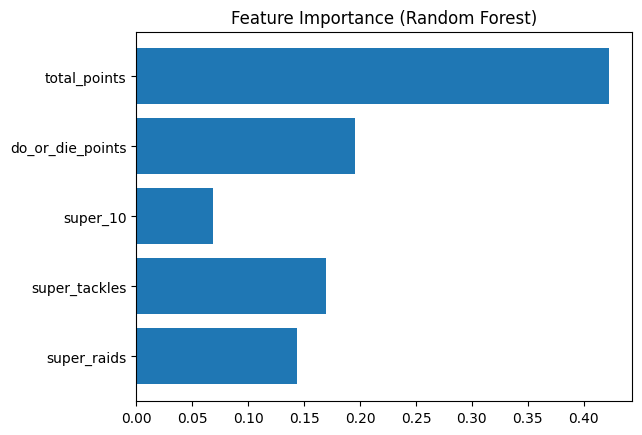

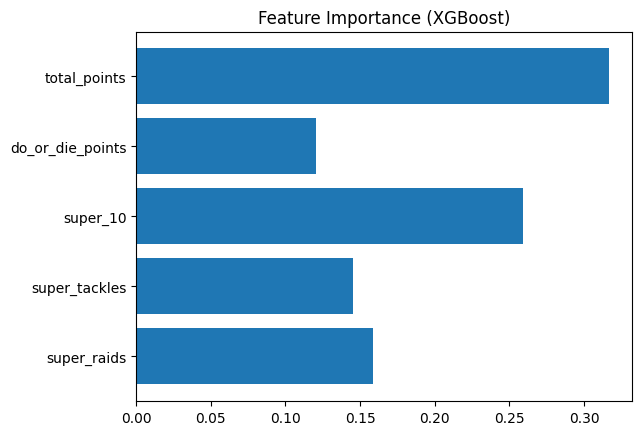


🎯 What-if Analysis: Effect of super_raids on Win Probability
super_raids=0, Win Probability=0.73
super_raids=1, Win Probability=0.81
super_raids=2, Win Probability=0.62
super_raids=3, Win Probability=0.54
super_raids=4, Win Probability=0.62
super_raids=5, Win Probability=0.48


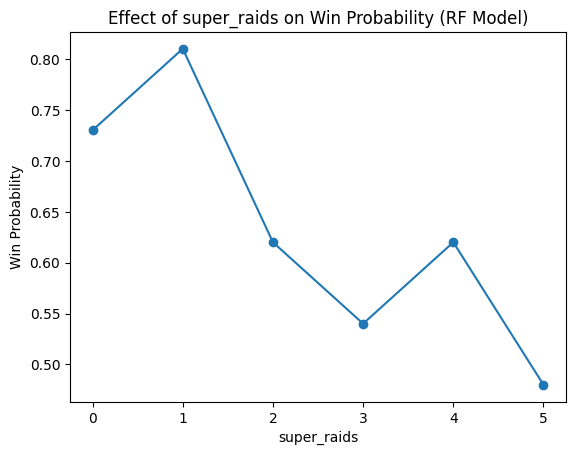


🎯 What-if Analysis: Effect of do_or_die_points on Win Probability
do_or_die_points=0, Win Probability=0.5
do_or_die_points=2, Win Probability=0.64
do_or_die_points=4, Win Probability=0.62
do_or_die_points=6, Win Probability=0.48
do_or_die_points=8, Win Probability=0.46
do_or_die_points=10, Win Probability=0.66


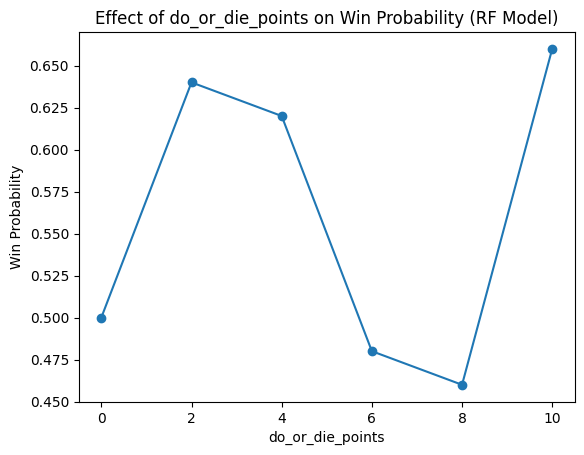


🎯 What-if Analysis: Effect of super_tackles on Win Probability
super_tackles=0, Win Probability=0.55
super_tackles=1, Win Probability=0.67
super_tackles=2, Win Probability=0.57
super_tackles=3, Win Probability=0.62
super_tackles=4, Win Probability=0.55
super_tackles=5, Win Probability=0.55
super_tackles=6, Win Probability=0.36


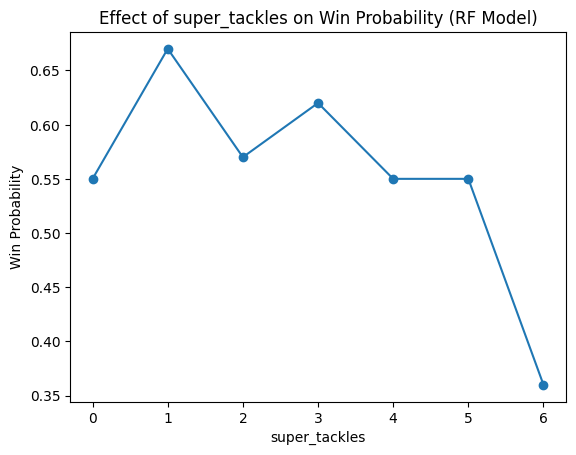

In [ ]:
# ==========================================
# TESTING & ANALYSIS SCRIPT (Colab)
# ==========================================

import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# ---- Load Test Data ----
test_df = pd.read_csv("kabaddi_test.csv")
features = joblib.load("features.pkl")

X_test, y_test = test_df[features], test_df['result']

# ---- Load Models ----
log_model = joblib.load("log_model.pkl")
dt_model = joblib.load("dt_model.pkl")
rf_model = joblib.load("rf_model.pkl")
xgb_model = joblib.load("xgb_model.pkl")
svm_model = joblib.load("svm_model.pkl")

models = {
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "SVM": svm_model
}

# ---- Evaluate Performance ----
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None

    results.append([name, acc, auc])
    print(f"\n🔹 {name}")
    print("Accuracy:", round(acc, 3))
    if auc: print("ROC AUC:", round(auc, 3))
    print(classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC_AUC"])
print("\n📊 Model Comparison:\n", results_df)

# ---- Raid Type Impact Analysis ----

# Logistic Regression Coefficients
coef = log_model.coef_[0]
print("\n⚖️ Logistic Regression Coefficients (Impact on Win Probability):")
for f, c in zip(features, coef):
    print(f"{f}: {round(c, 3)}")

plt.barh(features, coef)
plt.title("Logistic Regression Coefficients")
plt.show()

# Random Forest Feature Importance
rf_importances = rf_model.feature_importances_
plt.barh(features, rf_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

# XGBoost Feature Importance
xgb_importances = xgb_model.feature_importances_
plt.barh(features, xgb_importances)
plt.title("Feature Importance (XGBoost)")
plt.show()

# ---- What-if Analysis for All Raid Types ----

def what_if_analysis(feature_name, values, base_row, model):
    test_values = []
    for v in values:
        row = base_row.copy()
        row[feature_name] = v
        test_values.append(row)
    df_test = pd.DataFrame(test_values)
    pred_probs = model.predict_proba(df_test)[:,1]

    print(f"\n🎯 What-if Analysis: Effect of {feature_name} on Win Probability")
    for v, p in zip(values, pred_probs):
        print(f"{feature_name}={v}, Win Probability={round(p,2)}")

    plt.plot(values, pred_probs, marker="o")
    plt.xlabel(feature_name)
    plt.ylabel("Win Probability")
    plt.title(f"Effect of {feature_name} on Win Probability (RF Model)")
    plt.show()

# Base scenario: fixed values for all features
base_match = {
    "super_raids": 2,
    "super_tackles": 3,
    "super_10": 1,
    "do_or_die_points": 4,
    "total_points": 35
}

# Run analyses
what_if_analysis("super_raids", range(6), base_match, rf_model)
what_if_analysis("do_or_die_points", range(0, 11, 2), base_match, rf_model)
what_if_analysis("super_tackles", range(7), base_match, rf_model)


SEASONWISE AND MODELWISE COMPARISION OF SUPER RAIDS, SUPER 10s, SUPER TACKLES AND DO OR DIE POINTS



===== Do or Die Raids Analysis =====

Model Performance for Do or Die Raids:
            Model  R² Score   MAE
Linear Regression     0.239 2.328
              SVM     0.226 2.296
    Random Forest    -0.007 2.441
    Decision Tree    -0.636 3.278
          XGBoost    -1.226 3.609


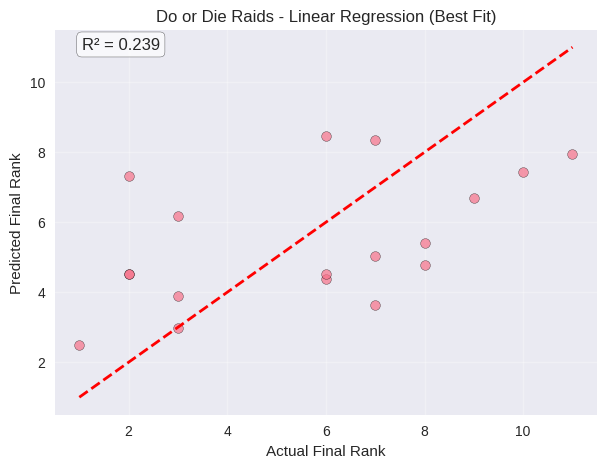


===== Super Raids Analysis =====

Model Performance for Super Raids:
            Model  R² Score   MAE
              SVM     0.383 2.369
Linear Regression     0.281 2.428
          XGBoost     0.266 2.570
    Random Forest     0.226 2.677
    Decision Tree     0.161 2.643


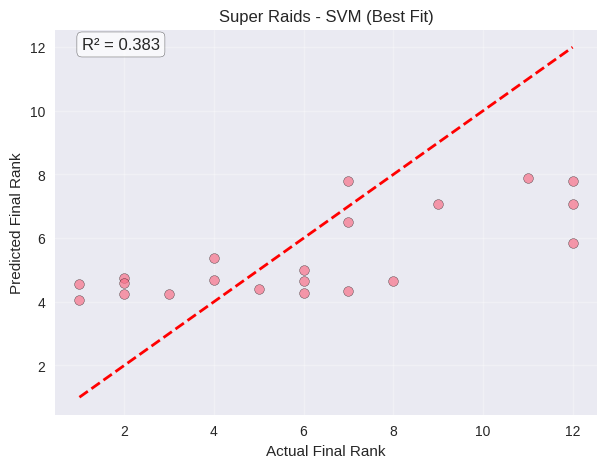


===== Super Tackles Analysis =====

Model Performance for Super Tackles:
            Model  R² Score   MAE
Linear Regression    -0.180 2.551
              SVM    -0.374 2.885
    Random Forest    -0.621 2.904
          XGBoost    -1.335 3.239
    Decision Tree    -1.546 3.730


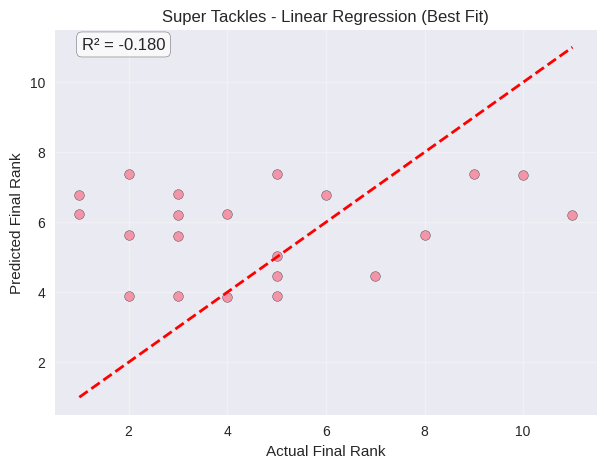


===== Super 10 Analysis =====

Model Performance for Super 10:
            Model  R² Score   MAE
Linear Regression     0.256 2.631
              SVM     0.158 2.933
    Random Forest     0.139 2.726
          XGBoost    -0.164 3.002
    Decision Tree    -0.612 3.714


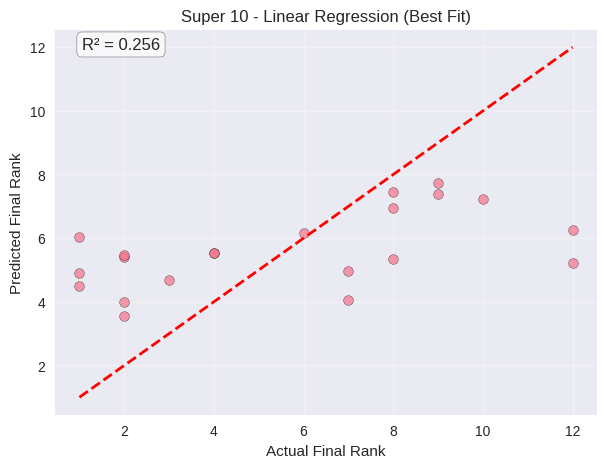



===== Overall Factor Importance =====
      Parameter        Best Model     R²   MAE  Influence Score
    Super Raids               SVM  0.383 2.369         0.161672
Do or Die Raids Linear Regression  0.239 2.328         0.102663
       Super 10 Linear Regression  0.256 2.631         0.097301
  Super Tackles Linear Regression -0.180 2.551        -0.070561

🏆 Order of Factors Influencing Match Outcome:

2. Super Raids: Influence Score = 0.1617 (R²=0.383, MAE=2.369, Model=SVM)
1. Do or Die Raids: Influence Score = 0.1027 (R²=0.239, MAE=2.328, Model=Linear Regression)
4. Super 10: Influence Score = 0.0973 (R²=0.256, MAE=2.631, Model=Linear Regression)
3. Super Tackles: Influence Score = -0.0706 (R²=-0.180, MAE=2.551, Model=Linear Regression)


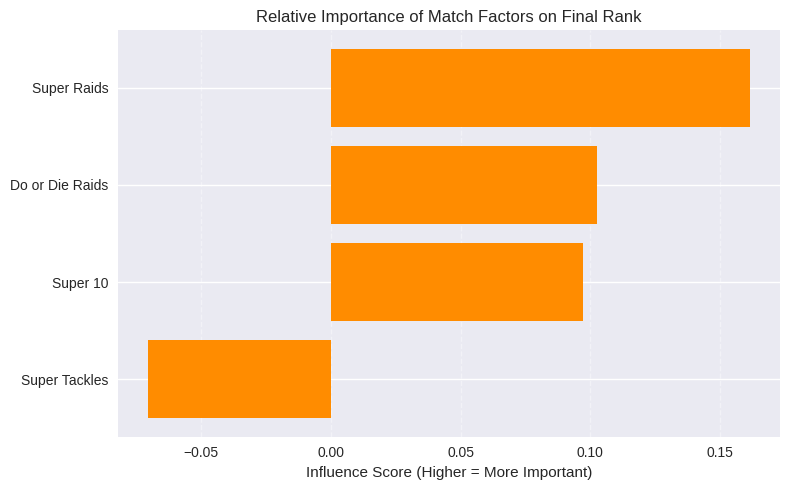

In [5]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ---------- Load JSON data ----------
def load_jsons_from_folder(folder_path):
    dataframes = []
    files = sorted(os.listdir(folder_path))
    for i, file in enumerate(files, start=1):
        if file.endswith(".json"):
            with open(os.path.join(folder_path, file), 'r') as f:
                data = json.load(f)
            df = pd.DataFrame(data['data'])
            df["season"] = i  # Add season as a feature
            dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)

# ---------- Train and evaluate tree-based models ----------
def train_and_evaluate(df, feature_cols=["rank", "season"], target="final_rank", stat_name=""):
    # Drop NaNs and ensure integers
    df = df[feature_cols + [target]].dropna().astype(int)

    X = df[feature_cols]
    y = df[target]

    # Random train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale features for non-tree models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Models
    models = {
        "Linear Regression": LinearRegression(),
        "SVM": SVR(kernel='rbf'),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    }

    results = []
    predictions = {}

    for name, model in models.items():
        if name in ["SVM", "Linear Regression"]:
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)

        r2 = r2_score(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        results.append({"Model": name, "R² Score": round(r2, 3), "MAE": round(mae, 3)})
        predictions[name] = preds

    # Convert results to DataFrame
    results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

    # Display model metrics only
    print(f"\nModel Performance for {stat_name}:")
    print(results_df.to_string(index=False))

    # Plot only best model
    best_model = results_df.iloc[0]["Model"]
    preds = predictions[best_model]
    r2 = results_df.iloc[0]["R² Score"]

    plt.figure(figsize=(7, 5))
    plt.scatter(y_test, preds, alpha=0.7, edgecolors='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f"{stat_name} - {best_model} (Best Fit)")
    plt.xlabel("Actual Final Rank")
    plt.ylabel("Predicted Final Rank")
    plt.text(0.05, 0.95, f"R² = {r2:.3f}", transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))
    plt.grid(True, alpha=0.3)
    plt.show()

    return results_df

# ---------- Main Script ----------
if __name__ == "__main__":
    base_dirs = {
        "Do or Die Raids": "Team_Do_or_Die",
        "Super Raids": "Team_Super_Raids",
        "Super Tackles": "Team_Super_Tackle",
        "Super 10": "Team_Super10"
    }

    factor_results = []  # To store best model metrics per factor

    for stat_name, folder in base_dirs.items():
        print(f"\n===== {stat_name} Analysis =====")
        df = load_jsons_from_folder(folder)
        results_df = train_and_evaluate(df, stat_name=stat_name)

        # Extract best model metrics for this stat
        best_row = results_df.iloc[0]
        factor_results.append({
            "Parameter": stat_name,
            "Best Model": best_row["Model"],
            "R²": best_row["R² Score"],
            "MAE": best_row["MAE"]
        })

    # ---------- Rank Factors by Influence ----------
    print("\n\n===== Overall Factor Importance =====")
    factor_df = pd.DataFrame(factor_results)
    factor_df["Influence Score"] = factor_df["R²"] / factor_df["MAE"]
    factor_df = factor_df.sort_values(by="Influence Score", ascending=False)

    print(factor_df.to_string(index=False))

    print("\n🏆 Order of Factors Influencing Match Outcome:\n")
    for i, row in factor_df.iterrows():
        print(f"{i+1}. {row['Parameter']}: Influence Score = {row['Influence Score']:.4f} "
              f"(R²={row['R²']:.3f}, MAE={row['MAE']:.3f}, Model={row['Best Model']})")

    # ---------- Plot Final Influence Ranking ----------
    plt.figure(figsize=(8, 5))
    plt.barh(factor_df["Parameter"], factor_df["Influence Score"], color='darkorange')
    plt.gca().invert_yaxis()
    plt.xlabel("Influence Score (Higher = More Important)")
    plt.title("Relative Importance of Match Factors on Final Rank")
    plt.grid(axis='x', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


pkl viewership

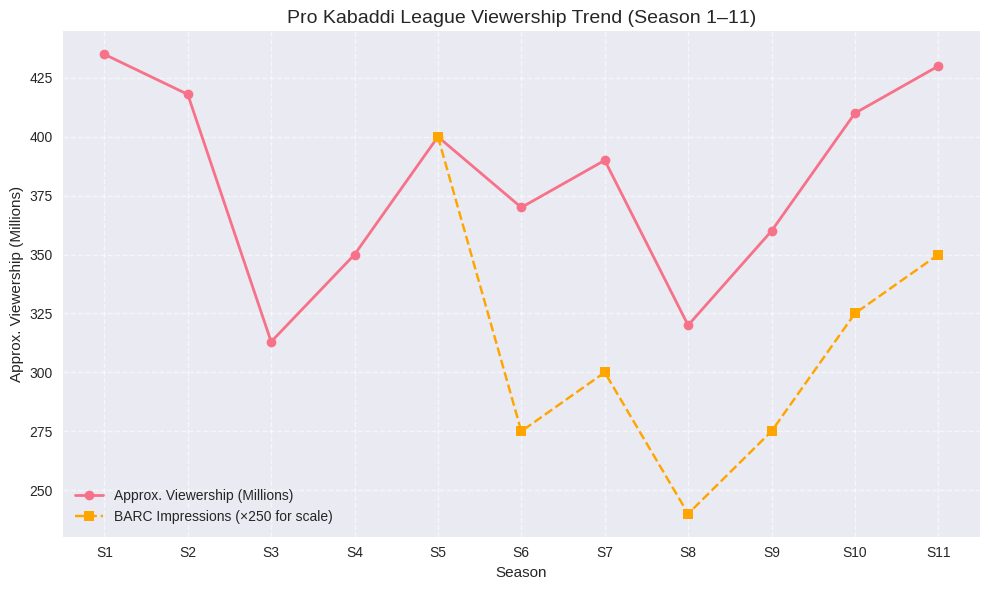

In [6]:
import matplotlib.pyplot as plt

# Seasons and data
seasons = list(range(1, 12))
years = [2014, 2015, 2016, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2025]
viewership_millions = [435, 418, 313, 350, 400, 370, 390, 320, 360, 410, 430]
barc_impressions = [None, None, None, None, 1.6, 1.1, 1.2, 0.96, 1.1, 1.3, 1.4]

plt.figure(figsize=(10, 6))

# Plot TV + Digital Reach
plt.plot(seasons, viewership_millions, marker='o', linewidth=2, label='Approx. Viewership (Millions)')

# Plot BARC impressions where available
valid = [i for i, x in enumerate(barc_impressions) if x is not None]
plt.plot([seasons[i] for i in valid], [barc_impressions[i]*250 for i in valid],  # scaled for same axis
         marker='s', linestyle='--', color='orange', label='BARC Impressions (×250 for scale)')

plt.title("Pro Kabaddi League Viewership Trend (Season 1–11)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Approx. Viewership (Millions)")
plt.xticks(seasons, [f"S{i}" for i in seasons])
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
